In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = []

In [83]:
# update the data.csv file with new logs
import re
import os
from pathlib import Path

files = Path('.').glob("*.log")
data = []
if not os.path.isfile('./data.csv'):
    print("[LOG] reading all log files")
    for f in files:
        with f.open() as log:
            text = f.read_text()
            broadcasts = re.findall(r"\d Broadcast \d{2}", text)
            # typo :)
            broadcasts+= re.findall(r"\d Braodcast \d{2}", text)
            broadcasts = list(map(lambda x: x[-2:], broadcasts))
#             print(broadcasts)
            data.append([len(broadcasts)])

    df = pd.DataFrame(
        data, columns=['Braodcasts'])
    df.to_csv('data.csv')
else:
    df = pd.read_csv('./data.csv')
df

,Unnamed: 0,Braodcasts
0,0,199
1,1,200
2,2,207
3,3,209
4,4,199
...,...,...
196,196,208
197,197,199
198,198,180
199,199,173


<AxesSubplot:>

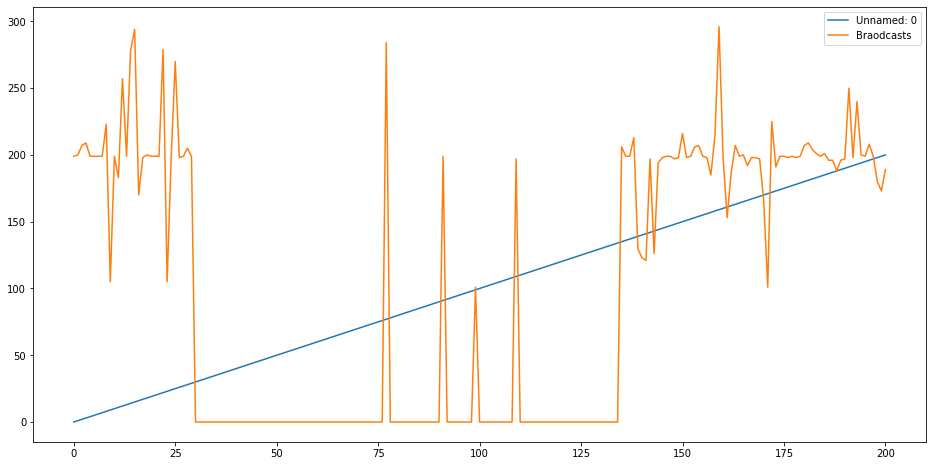

In [84]:
df.plot(figsize=(16,8))

In [85]:

delay_df = None
if not os.path.isfile('./delay.csv'):
    print('[log] read log file')
    with open("./log_out.log") as log:
        text = log.read()
        times = map(lambda x: float(x[0]) * (1 if x[2] == 'µ' else 1000), re.findall(r"hi in (\d+(\.\d+)?)(µ|n|m)?s", text))
        delay_df = pd.DataFrame(times, columns=['delay'])
        delay_df.to_csv('delay.csv')
else:
    pass
    delay_df = pd.read_csv('delay.csv')
delay_df.describe()


[log] read log file


,delay
count,100.000000
mean,192811.366670
std,378759.387505
min,1.005000
25%,1.097500
50%,1.312000
75%,3.533750
max,994000.000000


<AxesSubplot:>

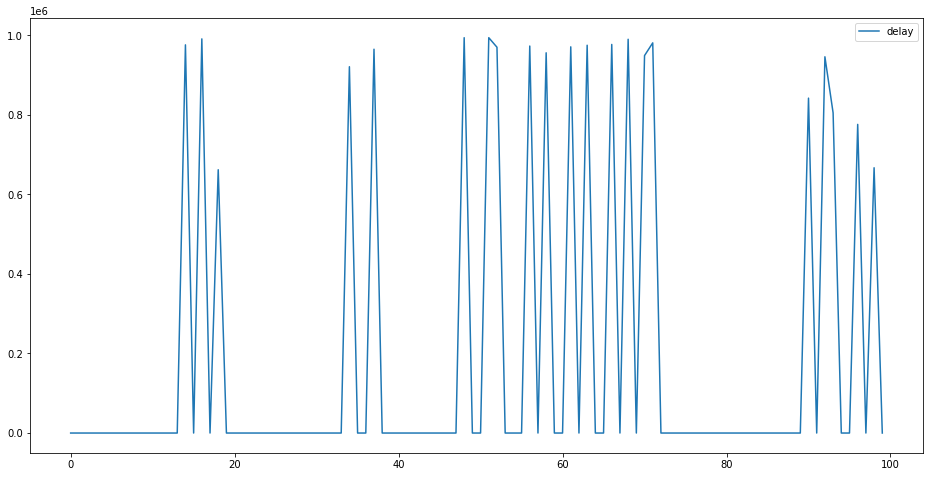

In [86]:
delay_df.plot(figsize=(16,8))